### Student Information
Name: Ssu-Hsien Yu, 余思賢

Student ID: 110065526

GitHub ID: phoxwupsh

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [326]:
### Begin Assignment Here

# I do the first part in "DM2022-Lab1-Master.ipynb",
# you can see the file in same folder, you can run all to see my result.
# Some section was modified to make the program run correctly,
# which is marked with ##==missing==##

# The second part to the fifth part are as below

In [327]:
# categories
categories = ["imdb.com","amazon.com","yelp.com"]

In [328]:
# read data
with open("sentiment labelled sentences/imdb_labelled.txt") as imdb_f:
    imdb_str = imdb_f.read()
with open("sentiment labelled sentences/amazon_cells_labelled.txt") as amazon_f:
    amazon_str = amazon_f.read()
with open("sentiment labelled sentences/yelp_labelled.txt") as yelp_f:
    yelp_str = yelp_f.read()

In [329]:
# turn in to table
imdb_arr = [e.split("\t") for e in imdb_str.splitlines()]
amazon_arr = [e.split("\t") for e in amazon_str.splitlines()]
yelp_arr = [e.split("\t") for e in yelp_str.splitlines()]

In [330]:
# transform into pandas dataframe
import pandas as pd

X_IMDB = pd.DataFrame.from_records(imdb_arr, columns=["sentence", "score"])
X_AMAZON = pd.DataFrame.from_records(amazon_arr, columns=["sentence", "score"])
X_YELP = pd.DataFrame.from_records(yelp_arr, columns=["sentence", "score"])

In [331]:
# set catergory and catergory name for the datas
X_IMDB["category"]=[0 for _ in imdb_arr]
X_IMDB["category_name"]=["imdb.com" for _ in imdb_arr]
X_AMAZON["category"]=[1 for _ in amazon_arr]
X_AMAZON["category_name"]=["amazon.com" for _ in amazon_arr]
X_YELP["category"]=[2 for _ in yelp_arr]
X_YELP["category_name"]=["yelp.com" for _ in yelp_arr]

In [332]:
# combine all of the data
X = pd.concat([X_IMDB, X_AMAZON, X_YELP], ignore_index=True)

In [333]:
# check missing value
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,2,0,0


In [334]:
# eliminate missing value
X_M = X.dropna()

In [335]:
# check whether it works
X_M.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [336]:
# check duplicated values
sum(X_M.duplicated())

17

In [337]:
# eliminate duplicated value
X_M_D = X.drop_duplicates(keep=False)

In [338]:
# check whether it works
sum(X_M_D.duplicated())

0

In [339]:
# re-index to correct the deleted entries
X_M_D.reset_index()

,index,sentence,score,category,category_name
0,0,"A very, very, very slow-moving, aimless movie ...",0,0,imdb.com
1,1,Not sure who was more lost - the flat characte...,0,0,imdb.com
2,2,Attempting artiness with black & white and cle...,0,0,imdb.com
3,3,Very little music or anything to speak of.,0,0,imdb.com
4,4,The best scene in the movie was when Gerardo i...,1,0,imdb.com
...,...,...,...,...,...
2963,2997,I think food should have flavor and texture an...,0,2,yelp.com
2964,2998,Appetite instantly gone.,0,2,yelp.com
2965,2999,Overall I was not impressed and would not go b...,0,2,yelp.com
2966,3000,"The whole experience was underwhelming, and I ...",0,2,yelp.com


imdb.com      996
yelp.com      992
amazon.com    980
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

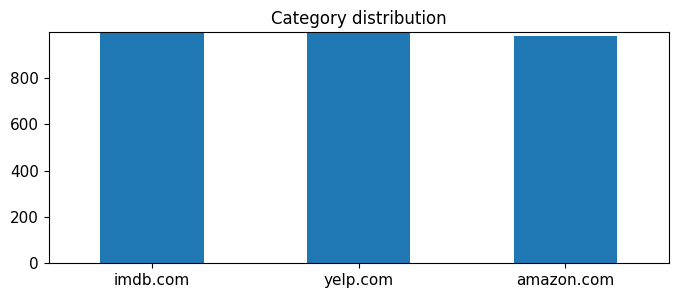

In [340]:
# make a plot of catergory distribution
import matplotlib.pyplot as plt

print(X_M_D.category_name.value_counts())
x_vc = X_M_D.category_name.value_counts()
x_vc.plot(kind ='bar',title ='Category distribution',ylim =[0,max(x_vc)],rot=0,fontsize = 11, figsize = (8,3))

In [341]:
# import nltk and check whether the necessary data is downloaded
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/phoxwupsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [342]:
# tokenize the text
xmd_unigram = X_M_D['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [343]:
# add the column
X_M_D["unigrams"] = xmd_unigram

/var/folders/_3/csxb01fx715cltcpp25qvg8w0000gn/T/ipykernel_71304/397822333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_M_D["unigrams"] = xmd_unigram


In [344]:
#learn the sentence and get document term matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_M_D["sentence"]) 
print(X_counts[0])

  (0, 4888)	3
  (0, 4131)	1
  (0, 2955)	1
  (0, 166)	1
  (0, 2953)	1
  (0, 75)	1
  (0, 1330)	1
  (0, 1400)	1
  (0, 5137)	1
  (0, 2763)	1


In [345]:
# check the size
X_counts.shape

(2968, 5153)

In [346]:
# reduce the dimension
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [347]:
# check whether it works
X_reduced.shape

(2968, 2)

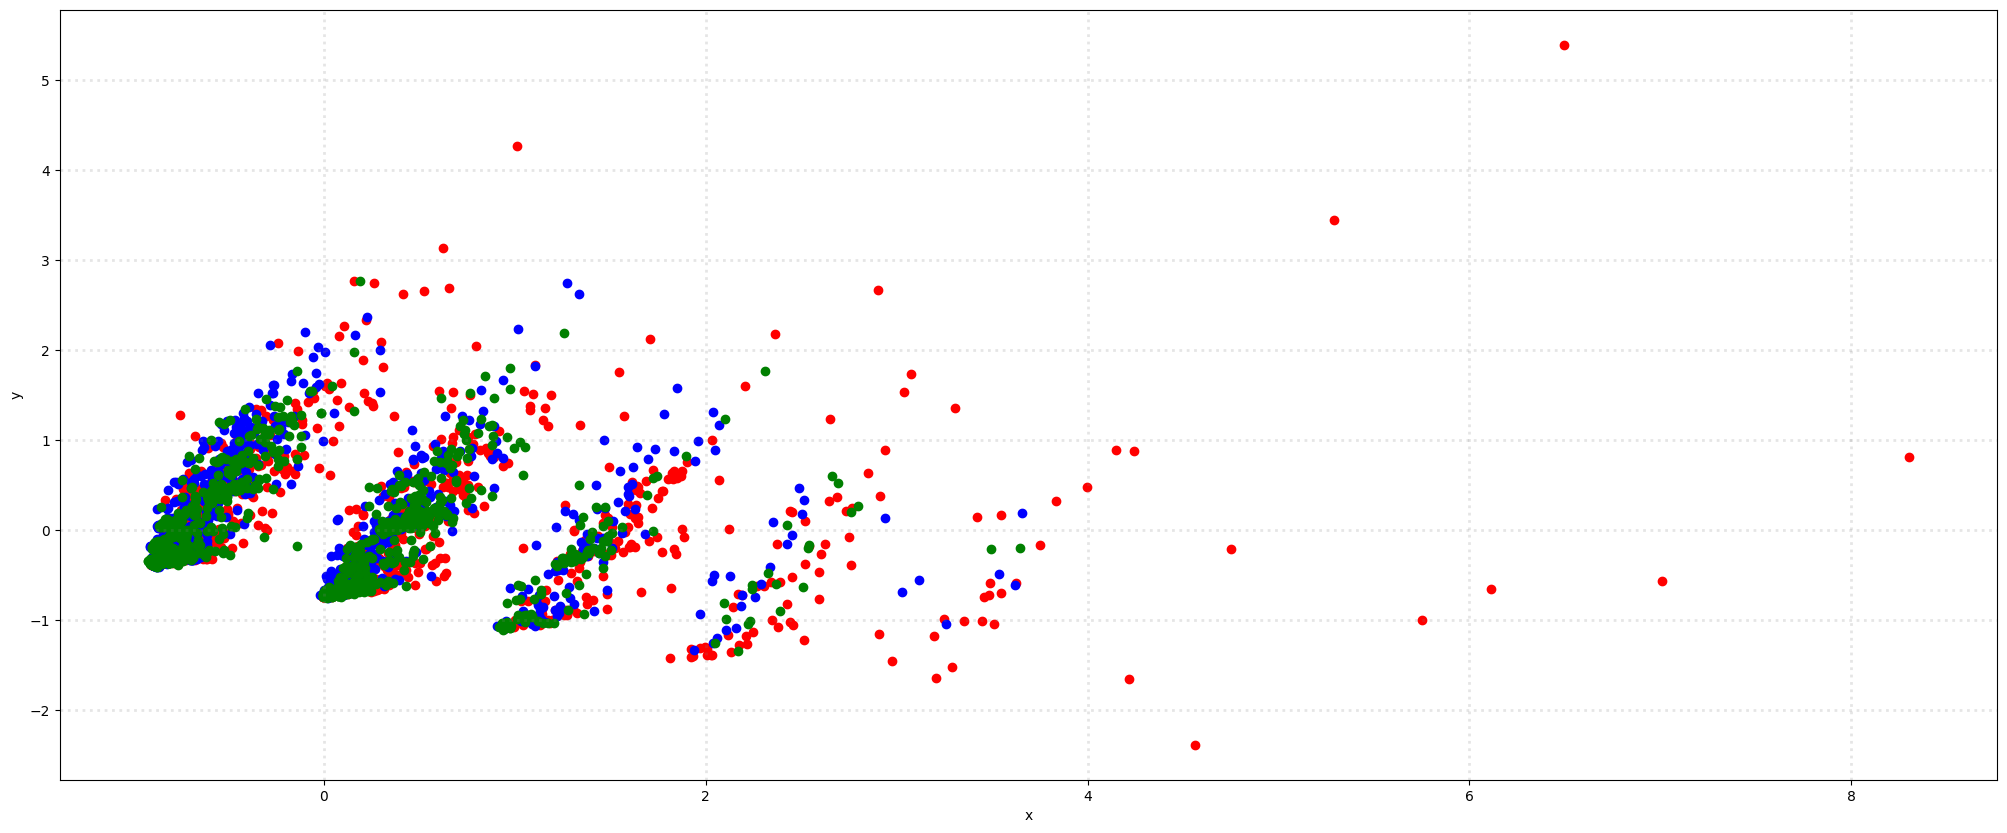

In [348]:
# make a data visulization in 2D
col = ['red', 'blue', 'green']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, category in zip(col, categories):
    xs = X_reduced[X_M_D['category_name'] == category].T[0]
    ys = X_reduced[X_M_D['category_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Text(0.5, 0, 'Z')

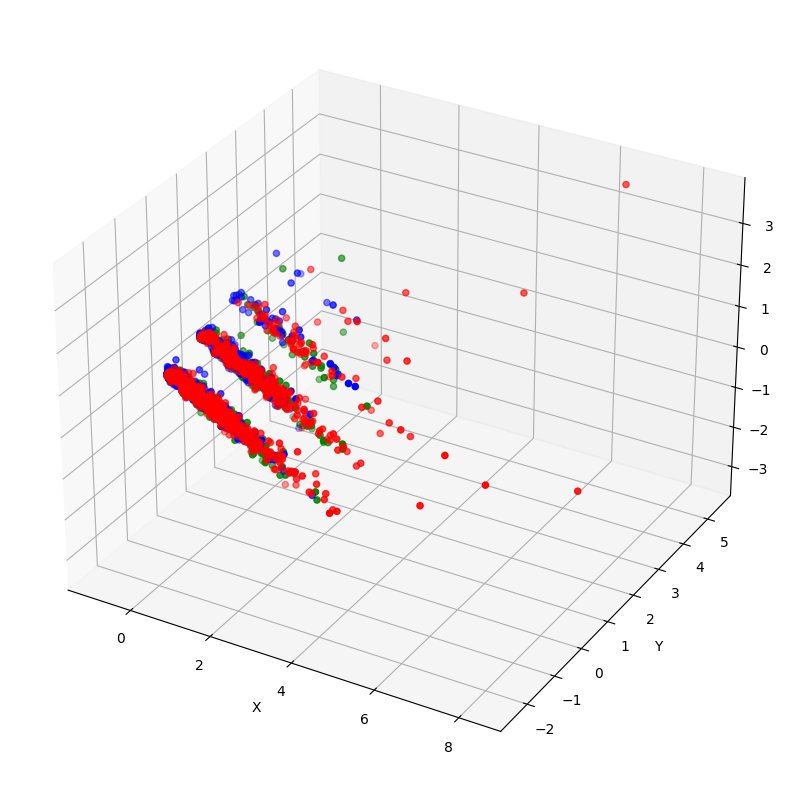

In [349]:
# make a data visualization in 3D
from mpl_toolkits.mplot3d import Axes3D

cols_3d = ["red","green","blue"] 
xr3 = PCA(n_components=3).fit_transform(X_counts.toarray())
fig_3d = plt.figure(figsize=(10,10))
ax_3d = plt.axes(projection="3d")

for c, category in zip(cols_3d, categories):
    xs = xr3[X_M_D["category_name"] == category].T[0]
    ys = xr3[X_M_D["category_name"] == category].T[1]
    zs = xr3[X_M_D["category_name"] == category].T[2]
    ax_3d.scatter3D(xs,ys,zs,c=c,marker='o')

ax_3d.grid(color="gray", linestyle=":", linewidth=1, alpha=0.2)
ax_3d.set_xlabel('X')
ax_3d.set_ylabel('Y')
ax_3d.set_zlabel("Z")

In [350]:
# calculate the transformation of the attributes
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

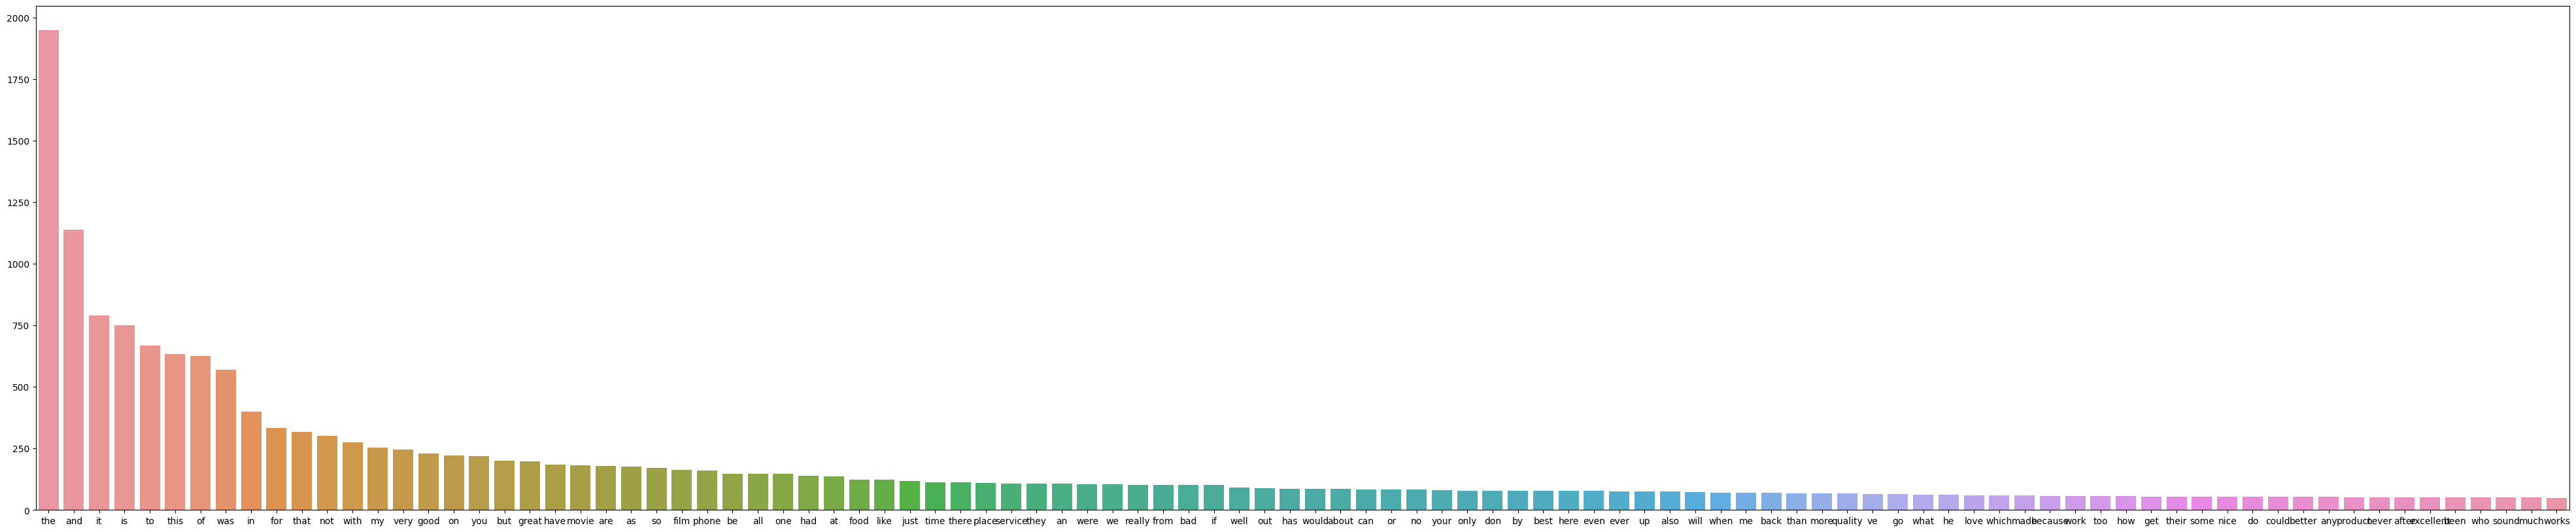

In [351]:
# make a long tail data visualization of the transformed data
import numpy as np
import seaborn as sns
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
perms = np.rec.fromarrays([term_frequencies,count_vect.get_feature_names_out()])
perms[::-1].sort()
plt.subplots(figsize=(50, 10))
g_sorted = sns.barplot(x=perms.f1[:100],y=perms.f0[:100])

In [352]:
# binarization of the category
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X_M_D.category)
X_M_D['bin_category'] = mlb.transform(X_M_D['category']).tolist()

/var/folders/_3/csxb01fx715cltcpp25qvg8w0000gn/T/ipykernel_71304/1761884903.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_M_D['bin_category'] = mlb.transform(X_M_D['category']).tolist()


In [353]:
# check whether it works
X_M_D

,sentence,score,category,category_name,unigrams,bin_category
0,"A very, very, very slow-moving, aimless movie ...",0,0,imdb.com,"[A, very, ,, very, ,, very, slow-moving, ,, ai...","[1, 0, 0]"
1,Not sure who was more lost - the flat characte...,0,0,imdb.com,"[Not, sure, who, was, more, lost, -, the, flat...","[1, 0, 0]"
2,Attempting artiness with black & white and cle...,0,0,imdb.com,"[Attempting, artiness, with, black, &, white, ...","[1, 0, 0]"
3,Very little music or anything to speak of.,0,0,imdb.com,"[Very, little, music, or, anything, to, speak,...","[1, 0, 0]"
4,The best scene in the movie was when Gerardo i...,1,0,imdb.com,"[The, best, scene, in, the, movie, was, when, ...","[1, 0, 0]"
...,...,...,...,...,...,...
2997,I think food should have flavor and texture an...,0,2,yelp.com,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2998,Appetite instantly gone.,0,2,yelp.com,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2999,Overall I was not impressed and would not go b...,0,2,yelp.com,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
3000,"The whole experience was underwhelming, and I ...",0,2,yelp.com,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


In [354]:
# generate TD IDF feature
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

transformer = TfidfTransformer(smooth_idf=True)
tf_idf = transformer.fit_transform(X_counts)

In [355]:
# check the TD IDF shape
tf_idf.shape

(2968, 5153)

In [356]:
# reduced the dimension with PCA
tf_idf_reduced = PCA(n_components = 2).fit_transform(tf_idf.toarray())

In [357]:
# check whether it works
tf_idf_reduced.shape

(2968, 2)

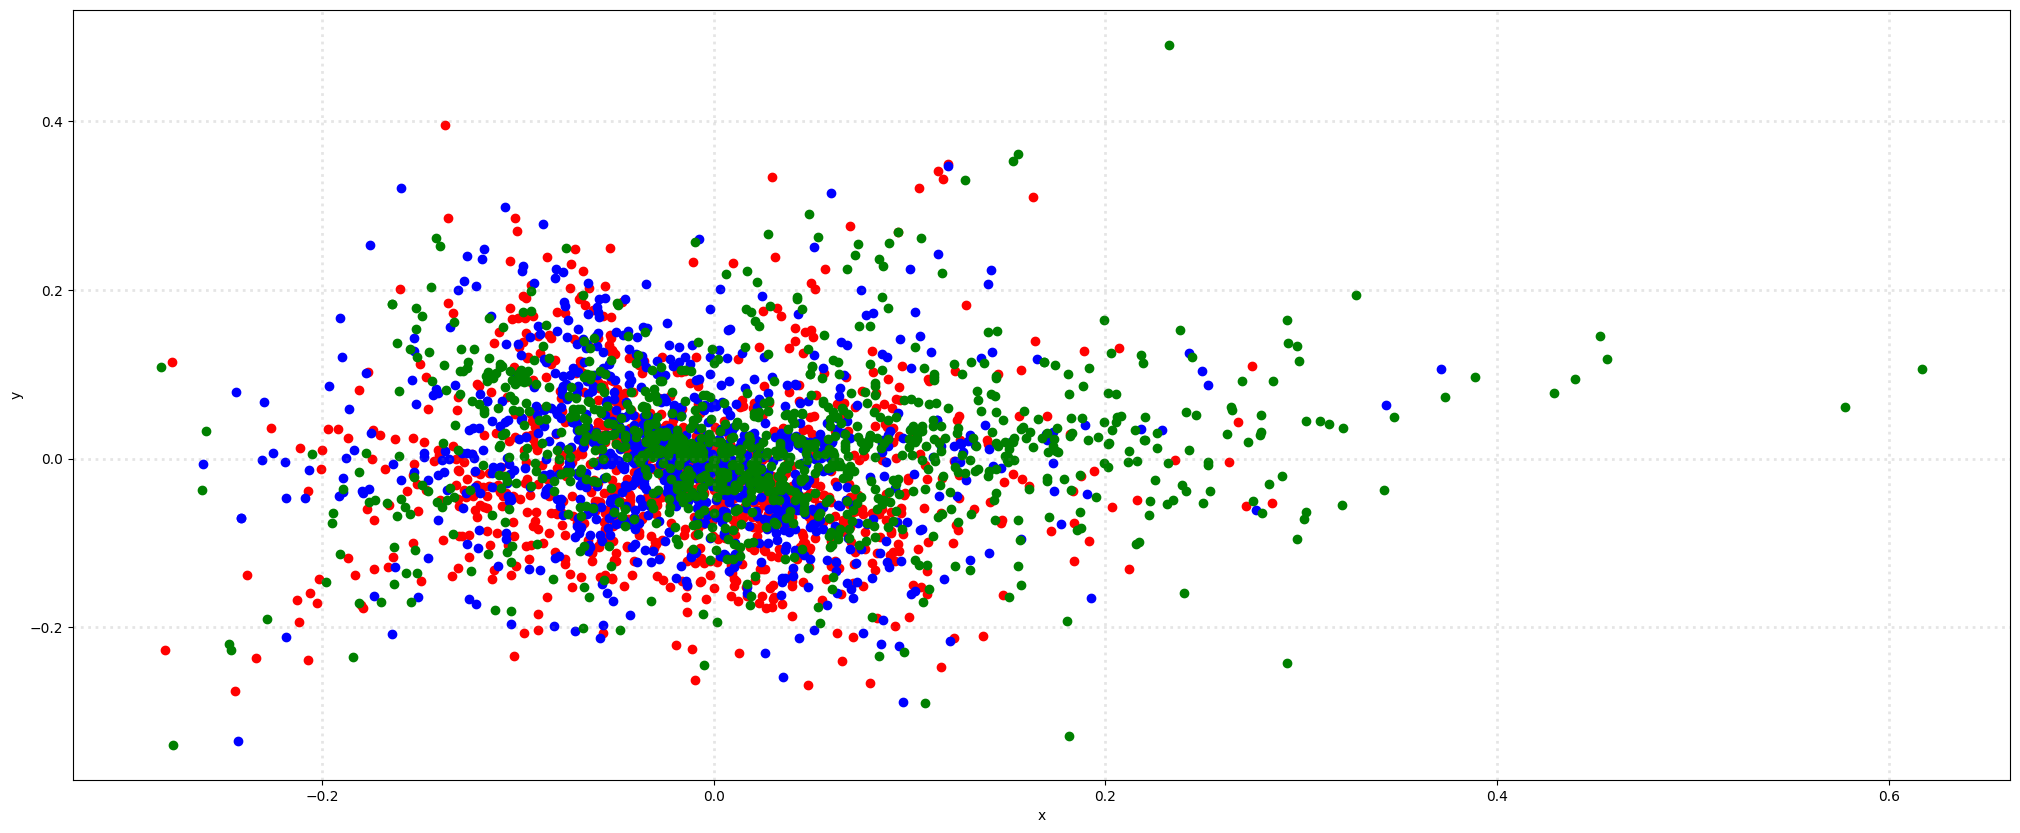

In [358]:
# make a data visulization of TD IDF in 2D
col = ['red', 'blue', 'green']
fig_tf_idf = plt.figure(figsize = (25,10))
ax_tf_idf = fig_tf_idf.subplots()
for c, category in zip(col, categories):
    xs = tf_idf_reduced[X_M_D['category_name'] == category].T[0]
    ys = tf_idf_reduced[X_M_D['category_name'] == category].T[1]
    ax_tf_idf.scatter(xs, ys, c = c, marker='o')
ax_tf_idf.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax_tf_idf.set_xlabel('x')
ax_tf_idf.set_ylabel('y')
plt.show()

In [359]:
# this is the Navie Bayer classifier with word frequency
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_reduced, X_M_D["category"], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(xtrain, ytrain)
bnb.score(xtest, ytest)

0.3894878706199461

In [360]:
# this is the Navie Bayer classifier with TF IDF
tfidf_xtrain, tfidf_xtest, tfidf_ytrain, tfidf_ytest = train_test_split(tf_idf_reduced, X_M_D["category"], test_size=0.25)
bnb = BernoulliNB(binarize=0.0)
bnb.fit(tfidf_xtrain, tfidf_ytrain)
bnb.score(tfidf_xtest, tfidf_ytest)

0.444743935309973

In [361]:
# It seems like TF IDF score a bit higher than word frequency